# Try hypergeometric test on PS and DS with Domestcation and Improvement gene sets
Do domestication and improvement related genes drive hourglass?  

Using supp. data from:

*Hufford, Matthew B., Xun Xu, Joost van Heerwaarden, Tanja Pyhäjärvi, Jer-Ming Chia, Reed A. Cartwright, Robert J. Elshire, et al. 2012. “Comparative Population Genomics of Maize Domestication and Improvement.” Nature Genetics 44 (7): 808–11.*

In [2]:
# load data

# load phylostratography
ps <- read.table("./myTAI_B73/B73_PS_phylostratr_181128_dupGIDs.txt", sep="\t", header=T)
head(ps)


X,qseqid,mrca,ps,mrca_name
11387,AC148152.3_FG001,131567,1,cellular organisms
16787,AC148152.3_FG005,131567,1,cellular organisms
3153,AC148152.3_FG006,131567,1,cellular organisms
11386,AC148152.3_FG008,131567,1,cellular organisms
43004,AC148167.6_FG001,35493,4,Streptophyta
37183,AC149475.2_FG002,33090,3,Viridiplantae


In [3]:
ps_order <- ps[ order(ps$qseqid, ps$ps) , ]              # sort by id and reverse of abs(value)
head(ps_order)
dim(ps_order)
ps_deDup <- ps_order[ !duplicated(ps_order$qseqid) , ]
dim(ps_deDup)

X,qseqid,mrca,ps,mrca_name
11387,AC148152.3_FG001,131567,1,cellular organisms
16787,AC148152.3_FG005,131567,1,cellular organisms
3153,AC148152.3_FG006,131567,1,cellular organisms
11386,AC148152.3_FG008,131567,1,cellular organisms
43004,AC148167.6_FG001,35493,4,Streptophyta
37183,AC149475.2_FG002,33090,3,Viridiplantae


[1] 63233     5

[1] 39468     5

In [4]:
# load divergence strata
ds <- read.table("./myTAI_B73/B73_DS_SItalica_orthologr_dupGIDs.txt", sep="\t", header=T)
head(ds)

X,DS,query_id
1,9,AC148152.3_FG005
2,3,AC148152.3_FG008
3,10,AC148167.6_FG001
4,3,AC149475.2_FG002
5,9,AC149475.2_FG005
6,8,AC149810.2_FG004


In [5]:
# load expression data 
dom <- read.table("../Domesticate_Improvement_Hufford2012/ng.2309-S2_domestication.txt", sep="\t", header=T)
head(dom)
dim(dom)

FGS.Gene.ID,Gene.Status,Chromosome,feature.start.site,feature.end.site,XPCLR.score,GO.Slim.annotation,Interpro.annotation
GRMZM2G059167,candidate,4,112830001,116940000,185.433,uncharacterized,uncharacterized
GRMZM2G702554,in selected region,4,112830001,116940000,185.433,uncharacterized,uncharacterized
GRMZM2G702552,in selected region,4,112830001,116940000,185.433,uncharacterized,uncharacterized
GRMZM2G423663,in selected region,4,112830001,116940000,185.433,uncharacterized,"Kelch repeat type 1, Galactose oxidase/kelch, beta-propeller, Kelch repeat type 2"
GRMZM2G384863,in selected region,4,112830001,116940000,185.433,uncharacterized,"High mobility group, superfamily, Bromodomain"
GRMZM2G171080,in selected region,4,112830001,116940000,185.433,catalytic activity,"Asp/Glu racemase, active site, Synaptojanin, N-terminal"


[1] 1764    8

In [6]:
# load expression data 
imp <- read.table("../Domesticate_Improvement_Hufford2012/ng.2309-S3_improvement.txt", sep="\t", header=T)
head(imp)
dim(imp)

FGS.Gene.ID,Gene.Status,Chromosome,feature.start.site,feature.end.site,XPCLR.score,GO.Slim.annotation,Interpro.annotation
GRMZM2G152354,candidate,8,23940001,24350000,55.8596,"catalytic activity, binding","Isopenicillin N synthase, 2OG-Fe(II) oxygenase"
GRMZM2G069687,in selected region,8,23940001,24350000,55.8596,binding,"Actin-binding WH2, Phosphopantetheine attachment site"
GRMZM2G069816,in selected region,8,23940001,24350000,55.8596,"RNA binding, nucleic acid binding","Paraneoplastic encephalomyelitis antigen, RNA recognition motif, RNP-1"
GRMZM2G085019,candidate,3,7070001,7150000,54.8003,"binding, catalytic activity, metabolic process, cellular process","Malic oxidoreductase, Malic enzyme, conserved site, NAD(P)-binding, Malic enzyme, N-terminal, Malic enzyme, NAD-binding"
GRMZM2G134284,candidate,7,169000001,169140000,50.2055,uncharacterized,uncharacterized
GRMZM2G434696,in selected region,7,169000001,169140000,50.2055,uncharacterized,"WD40 repeat, WD40 repeat-like"


[1] 1508    8

In [7]:
#isolate different PS

#create list of dataframes
#named by ps

sep_ps <- split(ps_deDup, f = paste("PS",ps$ps, sep = "") )
sep_ps[1]

Warning message in split.default(x = seq_len(nrow(x)), f = f, drop = drop, ...):
“data length is not a multiple of split variable”

,X,qseqid,mrca,ps,mrca_name
1,11387,AC148152.3_FG001,131567,1,cellular organisms
2,16787,AC148152.3_FG005,131567,1,cellular organisms
3,3153,AC148152.3_FG006,131567,1,cellular organisms
4,11386,AC148152.3_FG008,131567,1,cellular organisms
7,15983,AC149475.2_FG003,131567,1,cellular organisms
9,4849,AC149475.2_FG007,131567,1,cellular organisms
11,20210,AC149810.2_FG004,131567,1,cellular organisms
12,4841,AC149810.2_FG008,131567,1,cellular organisms
13,17894,AC149818.2_FG001,131567,1,cellular organisms
16,19290,AC149818.2_FG006,131567,1,cellular organisms


In [8]:
# count overlap in PS vs DOM

length( intersect( sep_ps$PS7$qseqid , dom$FGS.Gene.ID ) )
intersect( sep_ps$PS7$qseqid , dom$FGS.Gene.ID )

[1] 62

[1] "AC212827.3_FG005" "AC233863.1_FG002" "AC234169.1_FG004" "GRMZM2G006948"   
 [5] "GRMZM2G012841"    "GRMZM2G015880"    "GRMZM2G016622"    "GRMZM2G016923"   
 [9] "GRMZM2G023575"    "GRMZM2G028945"    "GRMZM2G029345"    "GRMZM2G037323"   
[13] "GRMZM2G039016"    "GRMZM2G039536"    "GRMZM2G043926"    "GRMZM2G045135"   
[17] "GRMZM2G045280"    "GRMZM2G047533"    "GRMZM2G055251"    "GRMZM2G061783"   
[21] "GRMZM2G065284"    "GRMZM2G069141"    "GRMZM2G069198"    "GRMZM2G069672"   
[25] "GRMZM2G073433"    "GRMZM2G079653"    "GRMZM2G082998"    "GRMZM2G088245"   
[29] "GRMZM2G092008"    "GRMZM2G104081"    "GRMZM2G105283"    "GRMZM2G106308"   
[33] "GRMZM2G107556"    "GRMZM2G107737"    "GRMZM2G108537"    "GRMZM2G127141"   
[37] "GRMZM2G128929"    "GRMZM2G129209"    "GRMZM2G138060"    "GRMZM2G157068"   
[41] "GRMZM2G161233"    "GRMZM2G163849"    "GRMZM2G165622"    "GRMZM2G167741"   
[45] "GRMZM2G172450"    "GRMZM2G173536"    "GRMZM2G179301"    "GRMZM2G330731"   
[49] "GRMZM2G331374"    "GRMZM2G370915"    "GRMZM2G381576"    "GRMZM2G386051"   
[53] "GRMZM2G392320"    "GRMZM2G397391"    "GRMZM2G406601"    "GRMZM2G418752"   
[57] "GRMZM2G421899"    "GRMZM2G433855"    "GRMZM2G435120"    "GRMZM2G445684"   
[61] "GRMZM2G451443"    "GRMZM2G479523"

In [9]:
#ok, now prep to calculate hypergeometric test

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS7`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS7`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample))
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )


[1]    62  1764 37704  1372


[1] 0.4829971

In [10]:
names(sep_ps)

[1] "PS1"  "PS10" "PS11" "PS12" "PS13" "PS14" "PS15" "PS16" "PS2"  "PS3" 
[11] "PS4"  "PS5"  "PS6"  "PS7"  "PS8"  "PS9"

In [11]:
for (frame in names(sep_ps)) {
    
    posSample <- length( intersect( sep_ps$frame$qseqid , dom$FGS.Gene.ID ) )
    totalPos <- length (dom$FGS.Gene.ID)
    totalNeg <- 39468 - length(dom$FGS.Gene.ID)
    totalSample <- length (sep_ps$frame$qseqid)
    print (frame)
    print (sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) ))

}

[1] "PS1"
[1] 1
[1] "PS10"
[1] 1
[1] "PS11"
[1] 1
[1] "PS12"
[1] 1
[1] "PS13"
[1] 1
[1] "PS14"
[1] 1
[1] "PS15"
[1] 1
[1] "PS16"
[1] 1
[1] "PS2"
[1] 1
[1] "PS3"
[1] 1
[1] "PS4"
[1] 1
[1] "PS5"
[1] 1
[1] "PS6"
[1] 1
[1] "PS7"
[1] 1
[1] "PS8"
[1] 1
[1] "PS9"
[1] 1


In [33]:
#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS1`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS1`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS2`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS2`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS3`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS3`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS4`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS4`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS5`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS5`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS6`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS6`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS7`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS7`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS8`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS8`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS9`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS9`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS10`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS10`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS11`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS11`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS12`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS12`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS13`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS13`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS14`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS14`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS15`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS15`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

#phyper(PosSample, TotalPos, TotalNeg, TotalSample, lower.tail=FALSE)
posSample <- length( intersect( sep_ps$`PS16`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS16`$qseqid)

print(c(posSample, totalPos, totalNeg, totalSample,
sum(dhyper (posSample:totalSample, totalPos, totalNeg, totalSample) )))

[1] 5.750000e+02 1.764000e+03 3.770400e+04 1.414400e+04 9.983954e-01
[1] 4.060000e+02 1.764000e+03 3.770400e+04 9.710000e+03 9.471971e-01
[1] 1.160000e+02 1.764000e+03 3.770400e+04 2.776000e+03 7.917466e-01
[1] 8.30000e+01 1.76400e+03 3.77040e+04 1.98100e+03 7.47132e-01
[1] 1.120000e+02 1.764000e+03 3.770400e+04 2.918000e+03 9.631682e-01
[1] 1.500000e+01 1.764000e+03 3.770400e+04 2.340000e+02 1.038842e-01
[1] 6.200000e+01 1.764000e+03 3.770400e+04 1.372000e+03 4.829971e-01
[1] 4.100000e+01 1.764000e+03 3.770400e+04 8.800000e+02 4.145563e-01
[1] 3.000000e+00 1.764000e+03 3.770400e+04 3.400000e+01 1.931707e-01
[1] 2.000000e+00 1.764000e+03 3.770400e+04 1.270000e+02 9.792672e-01
[1] 1.100000e+01 1.764000e+03 3.770400e+04 1.950000e+02 2.570538e-01
[1] 3.000000e+00 1.764000e+03 3.770400e+04 8.600000e+01 7.450562e-01
[1] 5.400000e+01 1.764000e+03 3.770400e+04 1.217000e+03 5.422073e-01
[1] 1.300000e+01 1.764000e+03 3.770400e+04 3.620000e+02 8.256998e-01
[1] 4.000000e+00 1.764000e+03 3.770400e

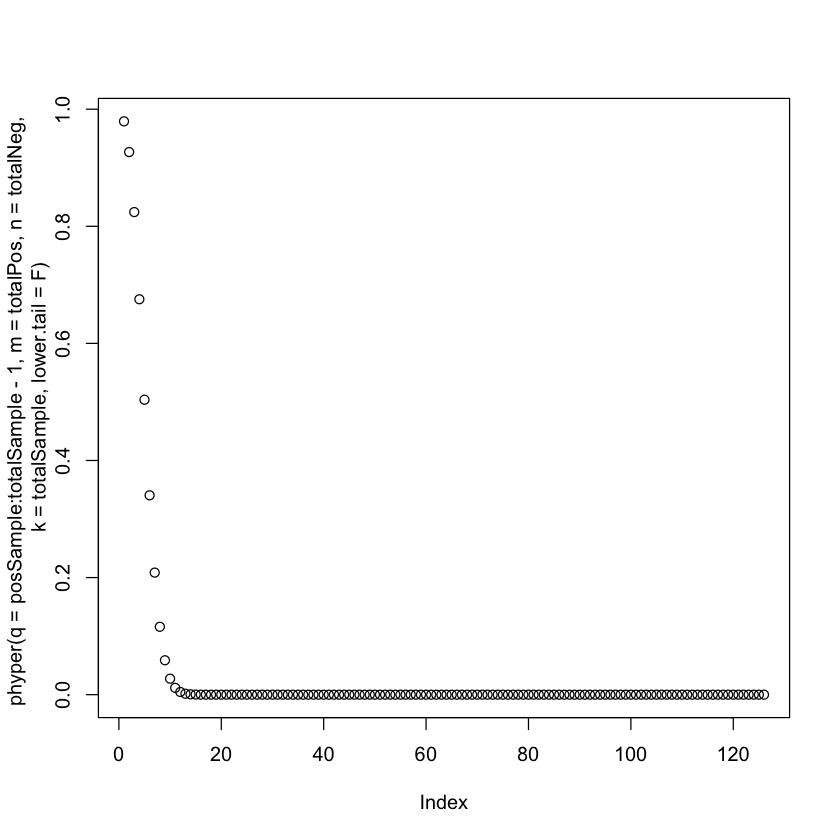

In [32]:
posSample <- length( intersect( sep_ps$`PS10`$qseqid , dom$FGS.Gene.ID ) )
totalPos <- length (dom$FGS.Gene.ID)
totalNeg <- 39468 - length(dom$FGS.Gene.ID)
totalSample <- length (sep_ps$`PS10`$qseqid)

plot(phyper (q=posSample:totalSample-1, m=totalPos, n=totalNeg, k=totalSample, lower.tail=F)) 